## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

In [4]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [5]:
stockx = pd.read_excel('StockX_Dataset.xlsx').dropna()
stockx.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [6]:
stockx_train, stockx_test = train_test_split(stockx, test_size=0.3, random_state=42, stratify=stockx['Sneaker Name'])
print(stockx_train.shape, stockx_test.shape)

(69969, 8) (29987, 8)


In [7]:
features= ['Sale Price', 'Retail Price']
dt_classification = DecisionTreeClassifier(max_depth = 7) # Increase max_depth to see effect in the plot
dt_classification.fit(stockx_train[features], stockx_train['Brand'])

DecisionTreeClassifier(max_depth=7)

In [9]:
predictionsOnTrainset = dt_classification.predict(stockx_train[features])
predictionsOnTestset = dt_classification.predict(stockx_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, stockx_train.Brand)
accuracyTest = calculate_accuracy(predictionsOnTestset, stockx_test.Brand)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9997999113893296
Accuracy on test set 0.9998332610798012


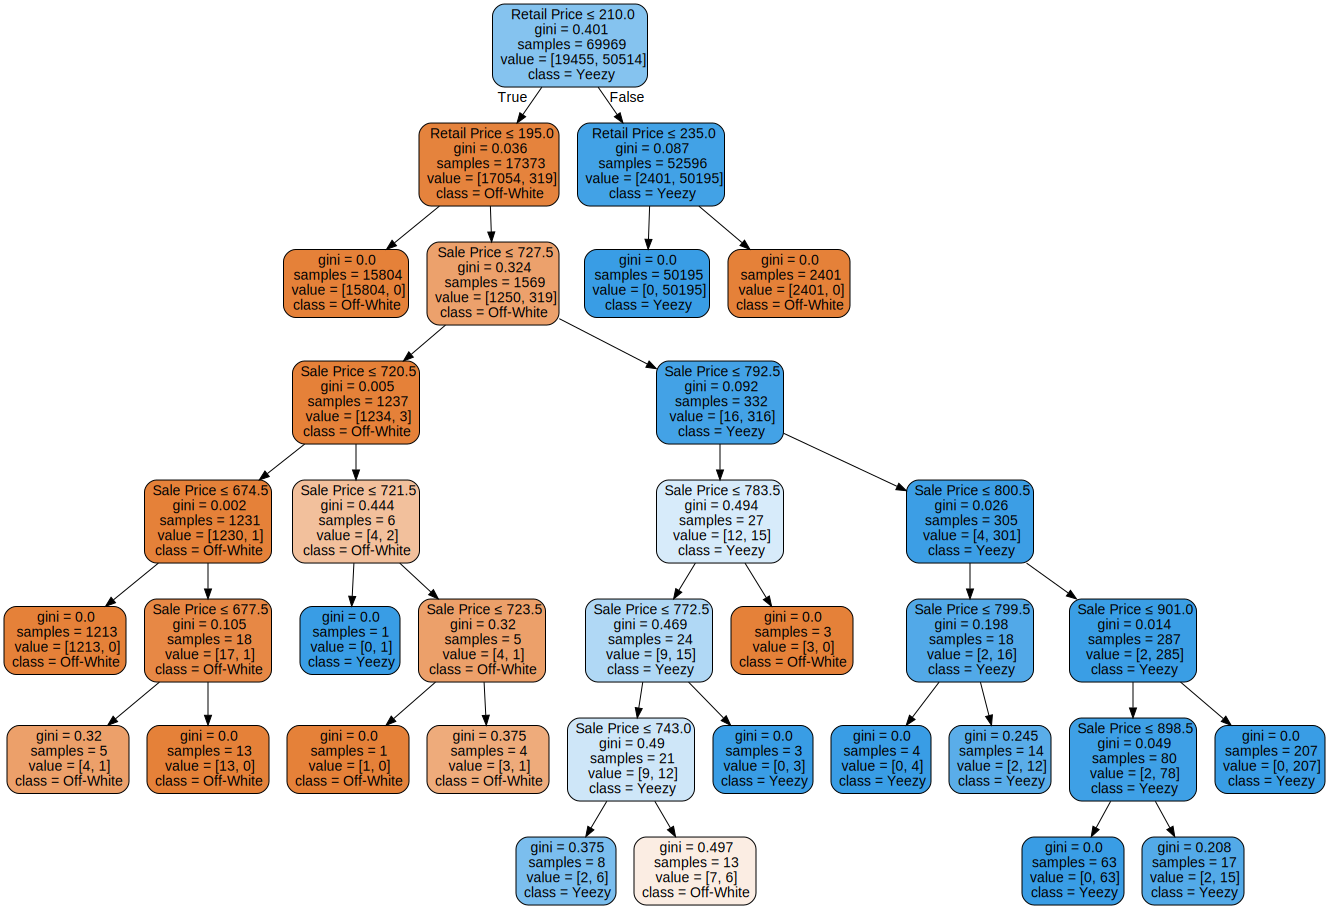

In [8]:
plot_tree_classification(dt_classification, features, np.sort(stockx.Brand.unique()))

Onderaan de tree is het programma heel zeker dat het sneaker brands kan onderscheiden op basis van prijzen. Zo is er bijvoorbeeld 1213 - 0 en 0 - 207. Deze zekerheid zorgt er dus ook voor dat er zo'n hoge accuratie is bij de test en training data sets.